In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.rcParams["figure.dpi"]=300
rng=np.random.RandomState(1) #assegna un seme specifico alla variabile rng


Definiamo una funzione di utility per definire vettori sul grafico di matplotlib inseriamo una annotation sul grafico contenete una freccia che utilizzeremo per disegnare le direzioni dei nuovi assi derivati con le prinipal component

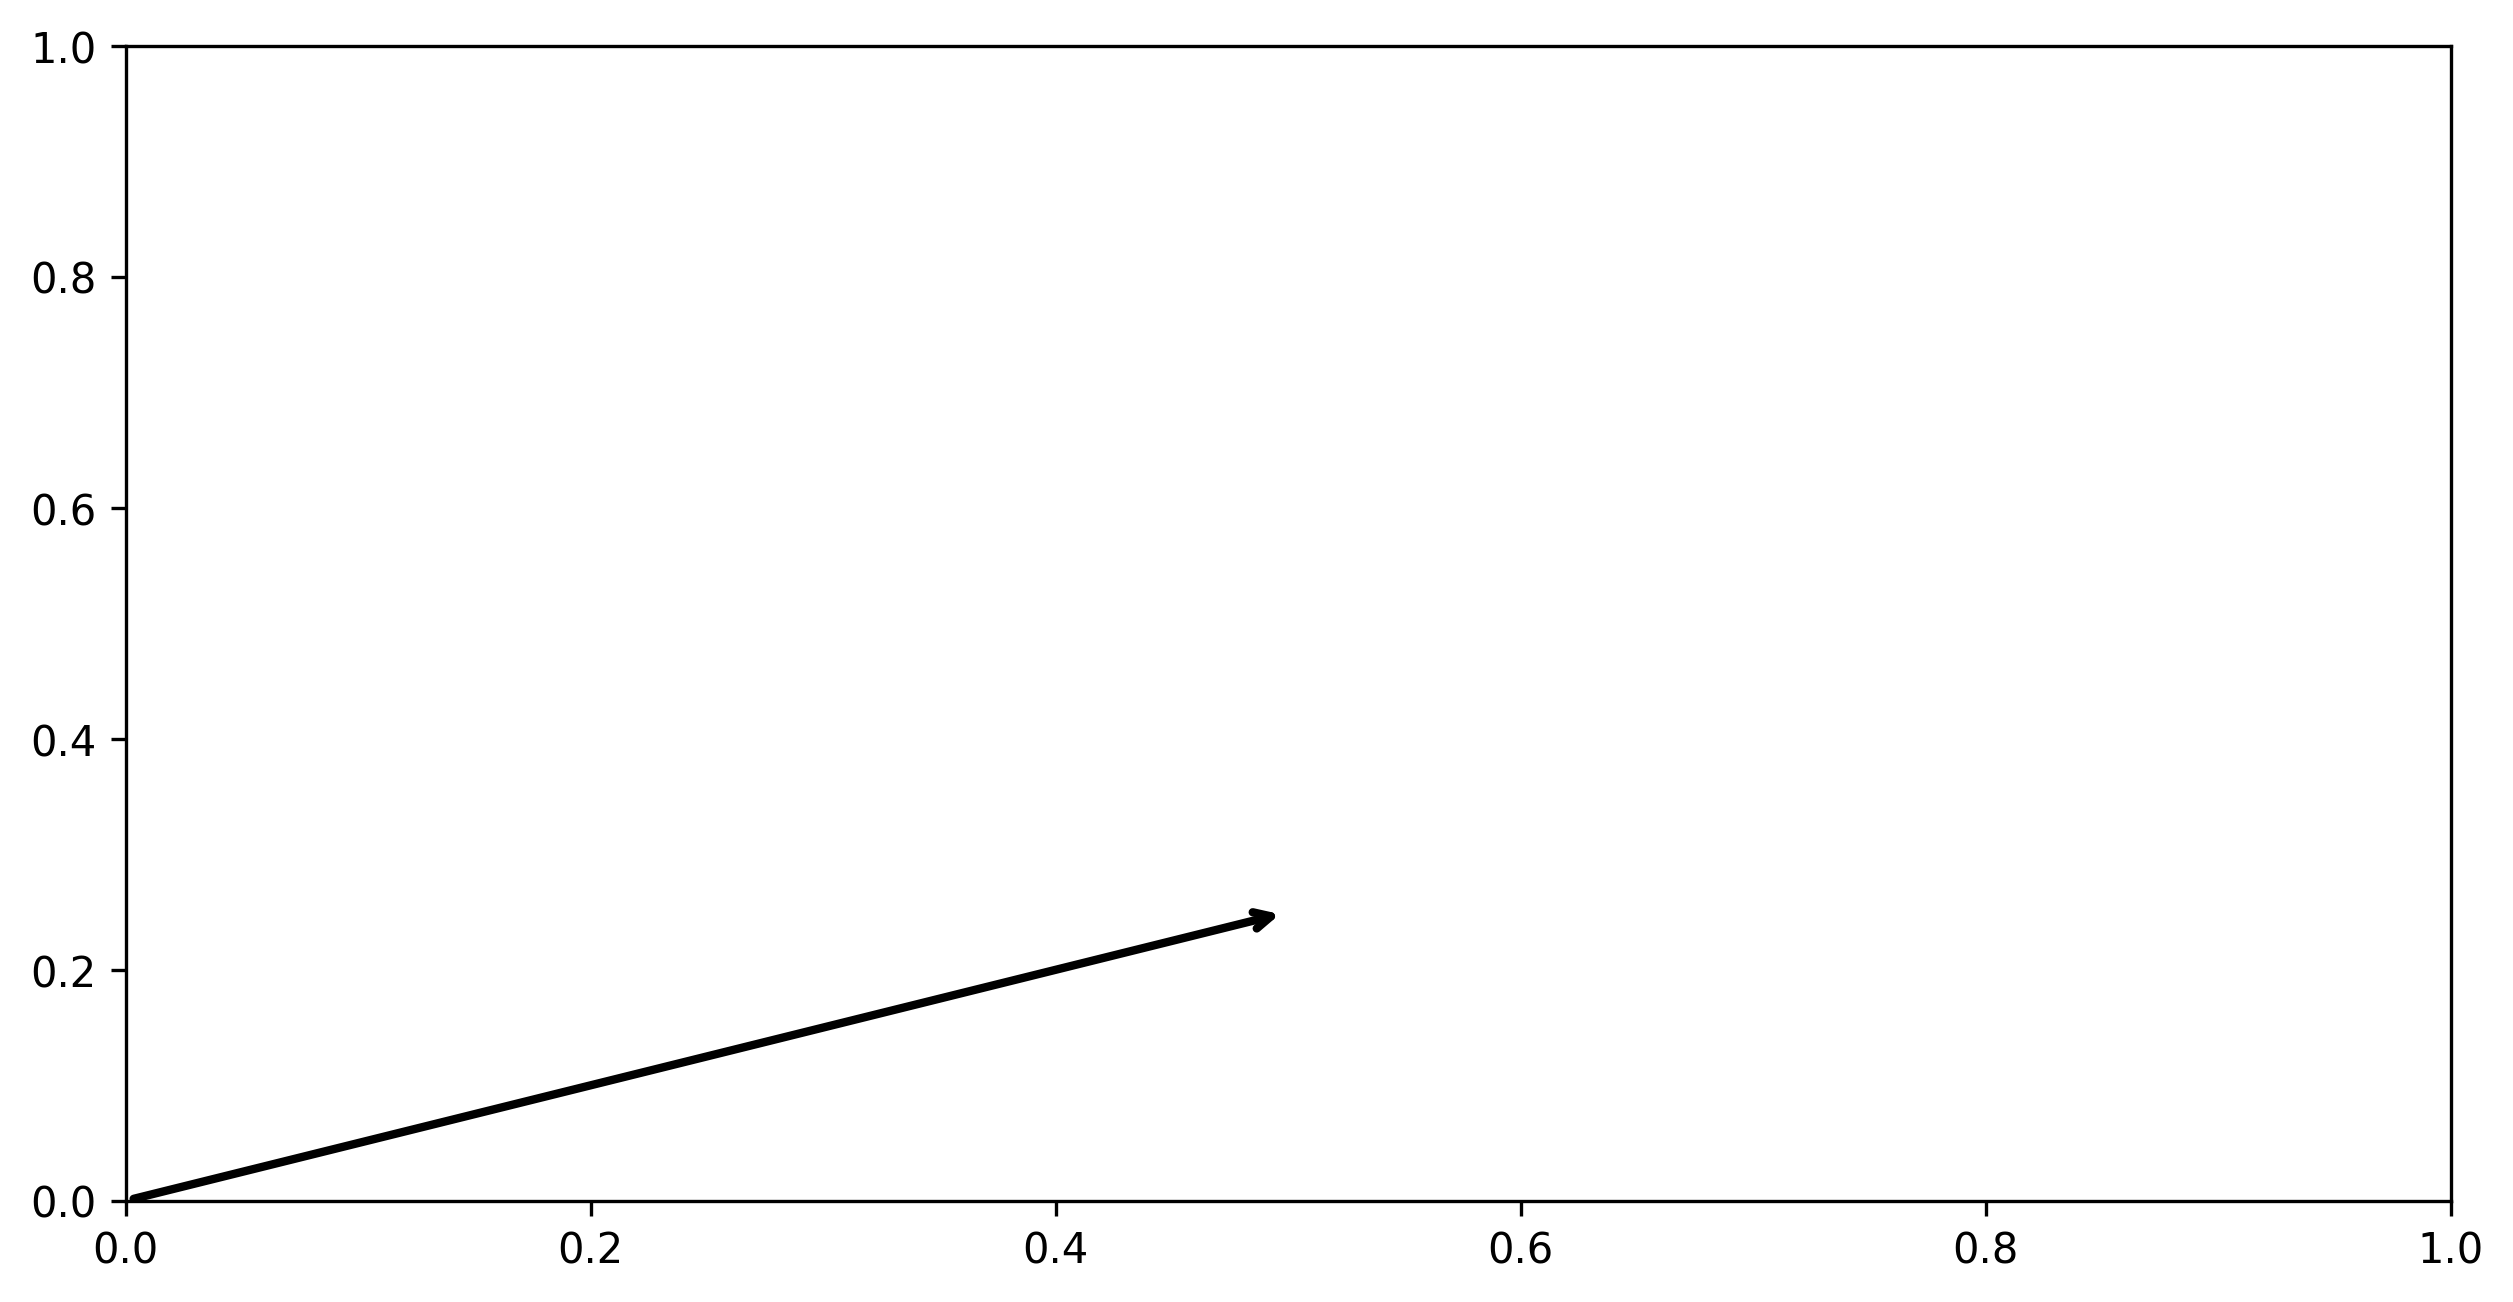

In [13]:
def draw_vector(p0,p1,ax):
    #p0 punto di inizio, p1 punto di arrivo, ax
    ax.annotate(
        '',  #inserirla non fa vedere l'inizio della freccia
        p1,
        p0,
        arrowprops={ #stile di freccia
            "arrowstyle":"->",
            "linewidth":2
        }
    )
#la funzione viene utilizzata nel sottografico di subplots
    
fig,ax=plt.subplots(1,1,figsize=(10,5))
draw_vector([0,0],[0.5,0.25],ax)

In [14]:
X1=rng.rand(2,2) #rand fa seguire ai dati una distribuzione uniform
X2=rng.randn(2,100) #randn fa seguire una distribuzione normale standard

Generiamo il dataset mediante un pordotto matriciale che ritorna 100 osseervazioni per due variabili

In [5]:
X=np.dot(X1,X2).T #100 osservazioni e 2 var
print(X.shape)

(100, 2)


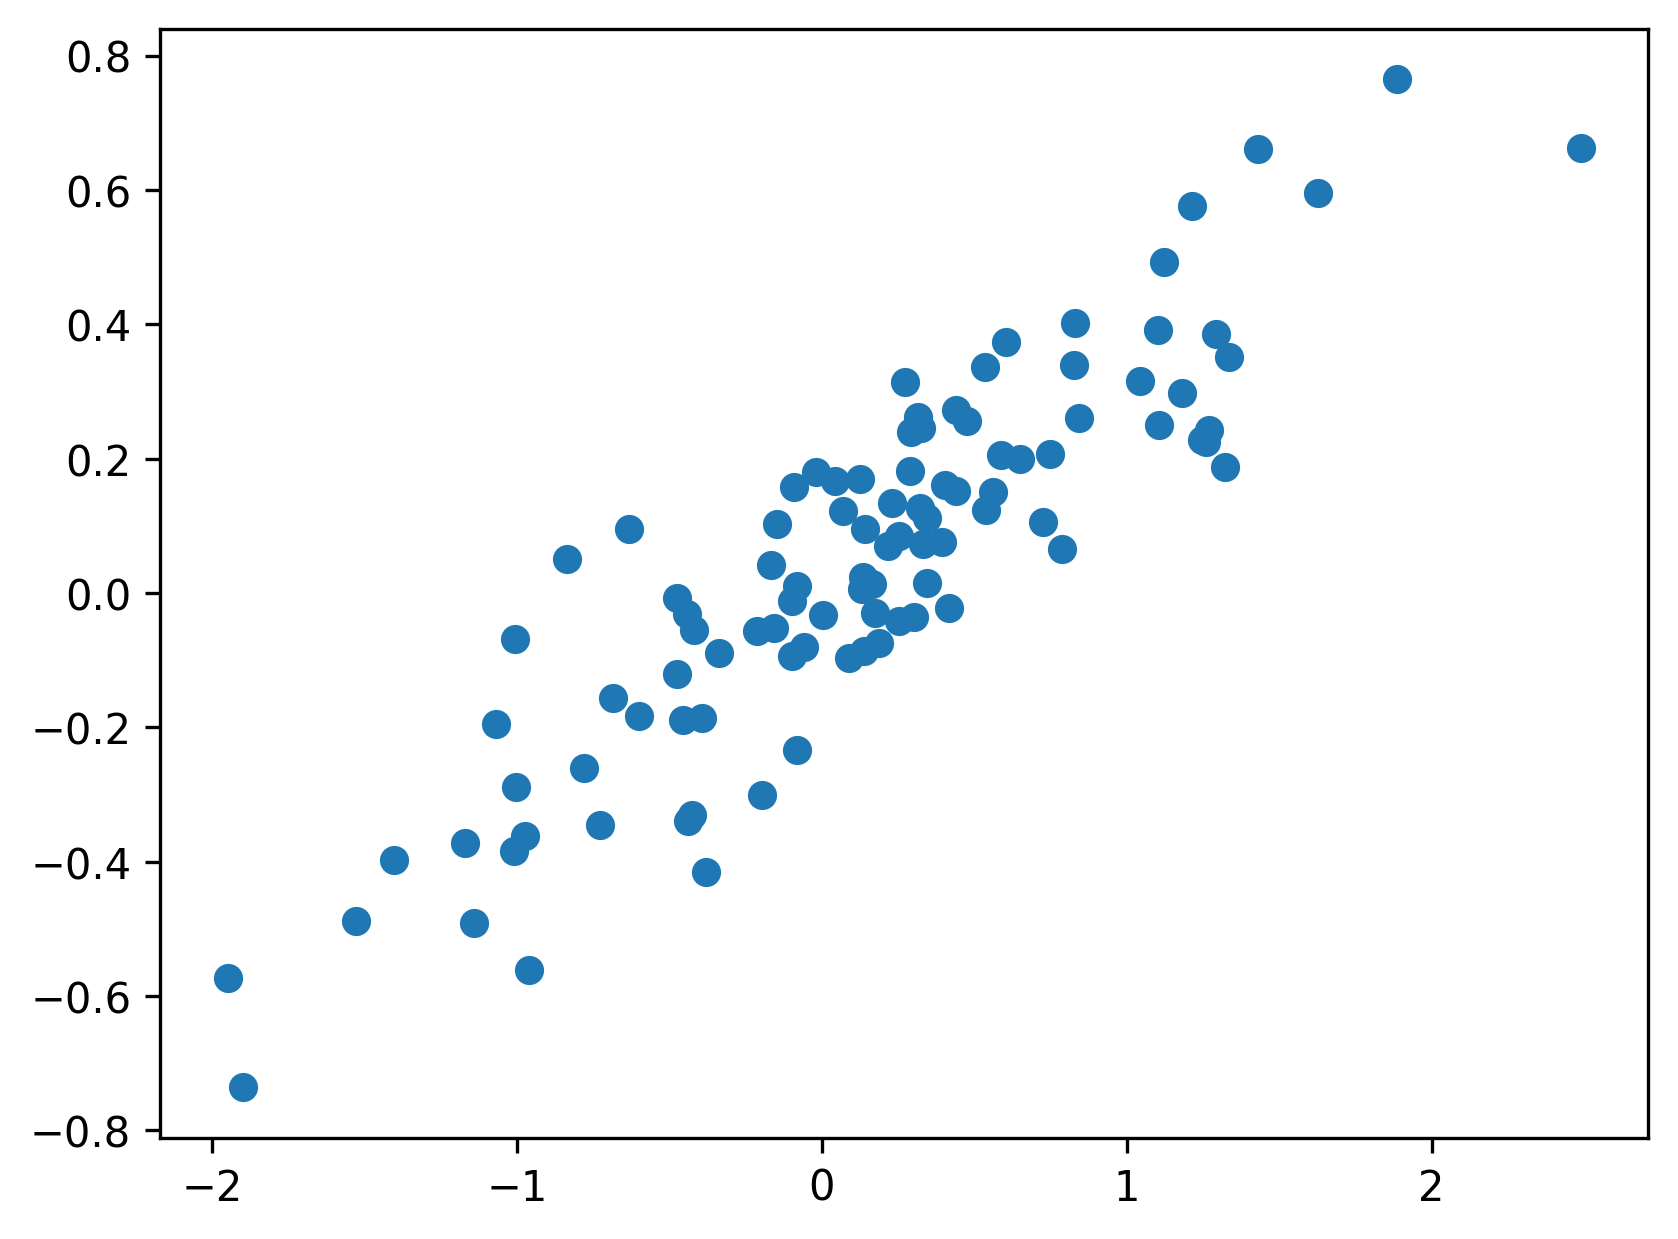

In [6]:
plt.scatter(X[:,0],X[:,1])

vediamo come le due variabili siano fortemente correlate in quanto i punti si dispongono attorno ad una linea retta

In [7]:
pca=PCA()
pca.fit(X)
print(pca.components_) #sono i coefficienti di x1 e x2 delle componenti principali 
print(pca.explained_variance_)

[[ 0.95257252  0.30431168]
 [-0.30431168  0.95257252]]
[0.71323427 0.01483411]


In [11]:
for magnitude, direction in zip(pca.explained_variance_,pca.components_):
    #zip combina elementi di iterabili(tuple,liste..) in coppie formate da un elemento di ciascun iterabile
    print(f"Variance->{magnitude}")
    print(f"PCA x component->{direction[0]}")
    print(f"PCA x component->{direction[1]}")

    print("\n") #inserisce uno spazio tra le due direzioni

Variance->0.7132342735560835
PCA x component->0.9525725183950094
PCA x component->0.30431167772300405


Variance->0.014834114209194787
PCA x component->-0.30431167772300405
PCA x component->0.9525725183950094




(-2.170255554178351,
 2.711338341643358,
 -0.8112002823393254,
 0.8394427482643845)

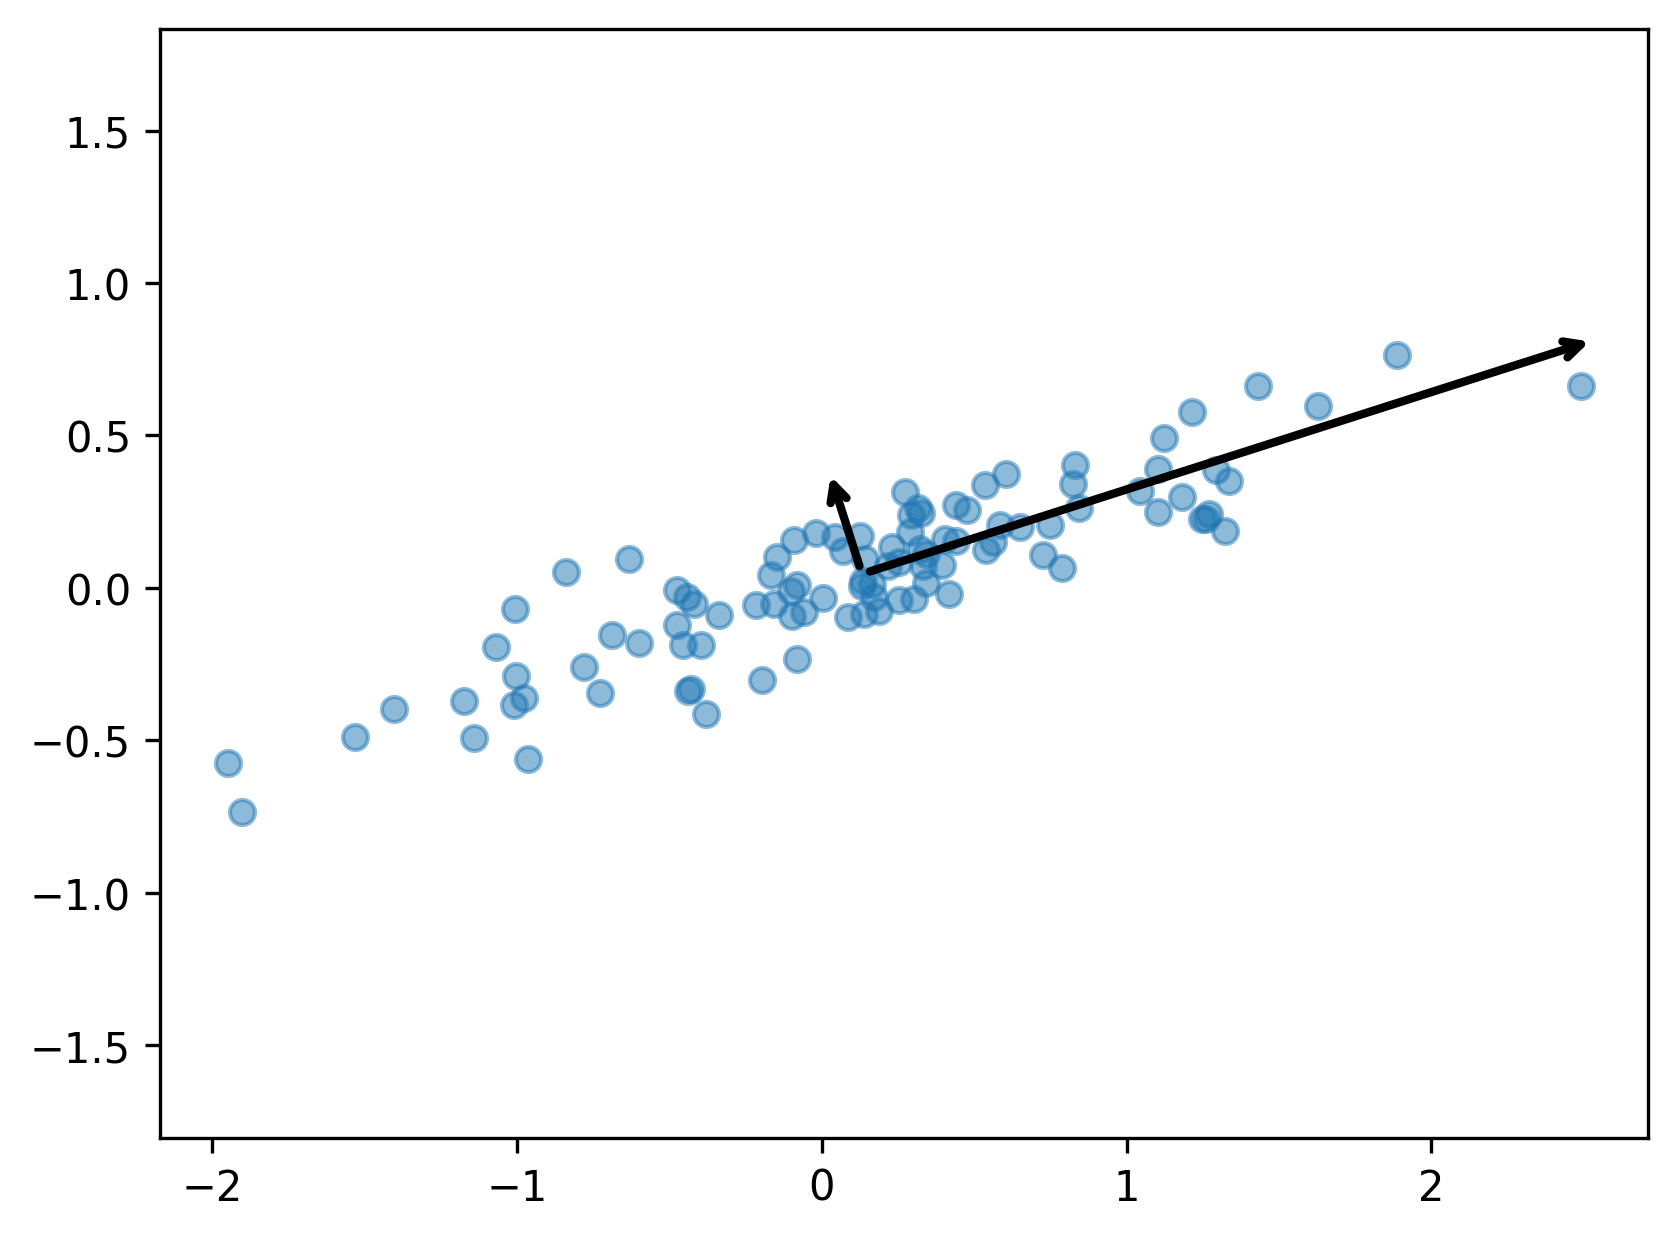

In [21]:
plt.scatter(X[:,0],X[:,1], alpha=0.5) #alpha imposta la trasparenza dei  punti nello scatter
for magnitude, direction in zip(pca.explained_variance_,pca.components_):
    v=direction*3*np.sqrt(magnitude)
    #per ogni componente principale viene calcolato un vettore che rappresenta la direzione e la
    #magnitudine della varianza spiegata della componente
    draw_vector(pca.mean_,pca.mean_+v, plt.gca())
    #disegnamo le componenti a partire dai punti medi
    #plt.gca() restituisce l'oggetto axes corrente, rappresenta l'area di disegno su cui verranno visualizzati i grafici

#sistemiamo le scale degli assi in  modo che i due vettori risultino perpendicolari
plt.axis("equal")

In [ ]:
#quanta informazione è racchiusa nelle due componenti principali
per_var=np.round(pca.explained_variance_ratio_*100, decimals=2)

labels=["PC"+str(x+1) for x in range(0,len(per_var))] 
print(labels)
plt.bar(x=range(0,len(per_var)),height=per_var, tick_label=labels)
plt.ylabel("Percentuale di varianza ottenuta")
plt.xlabel("Componenti  Principali")

Creiamo un nuovo dataset basato sulle due componenti principali che abbiamo trovato, le colonne sono le pc mentre le osservazioni sono i dati trasformati.

Text(0, 0.5, 'PC2-2.04')

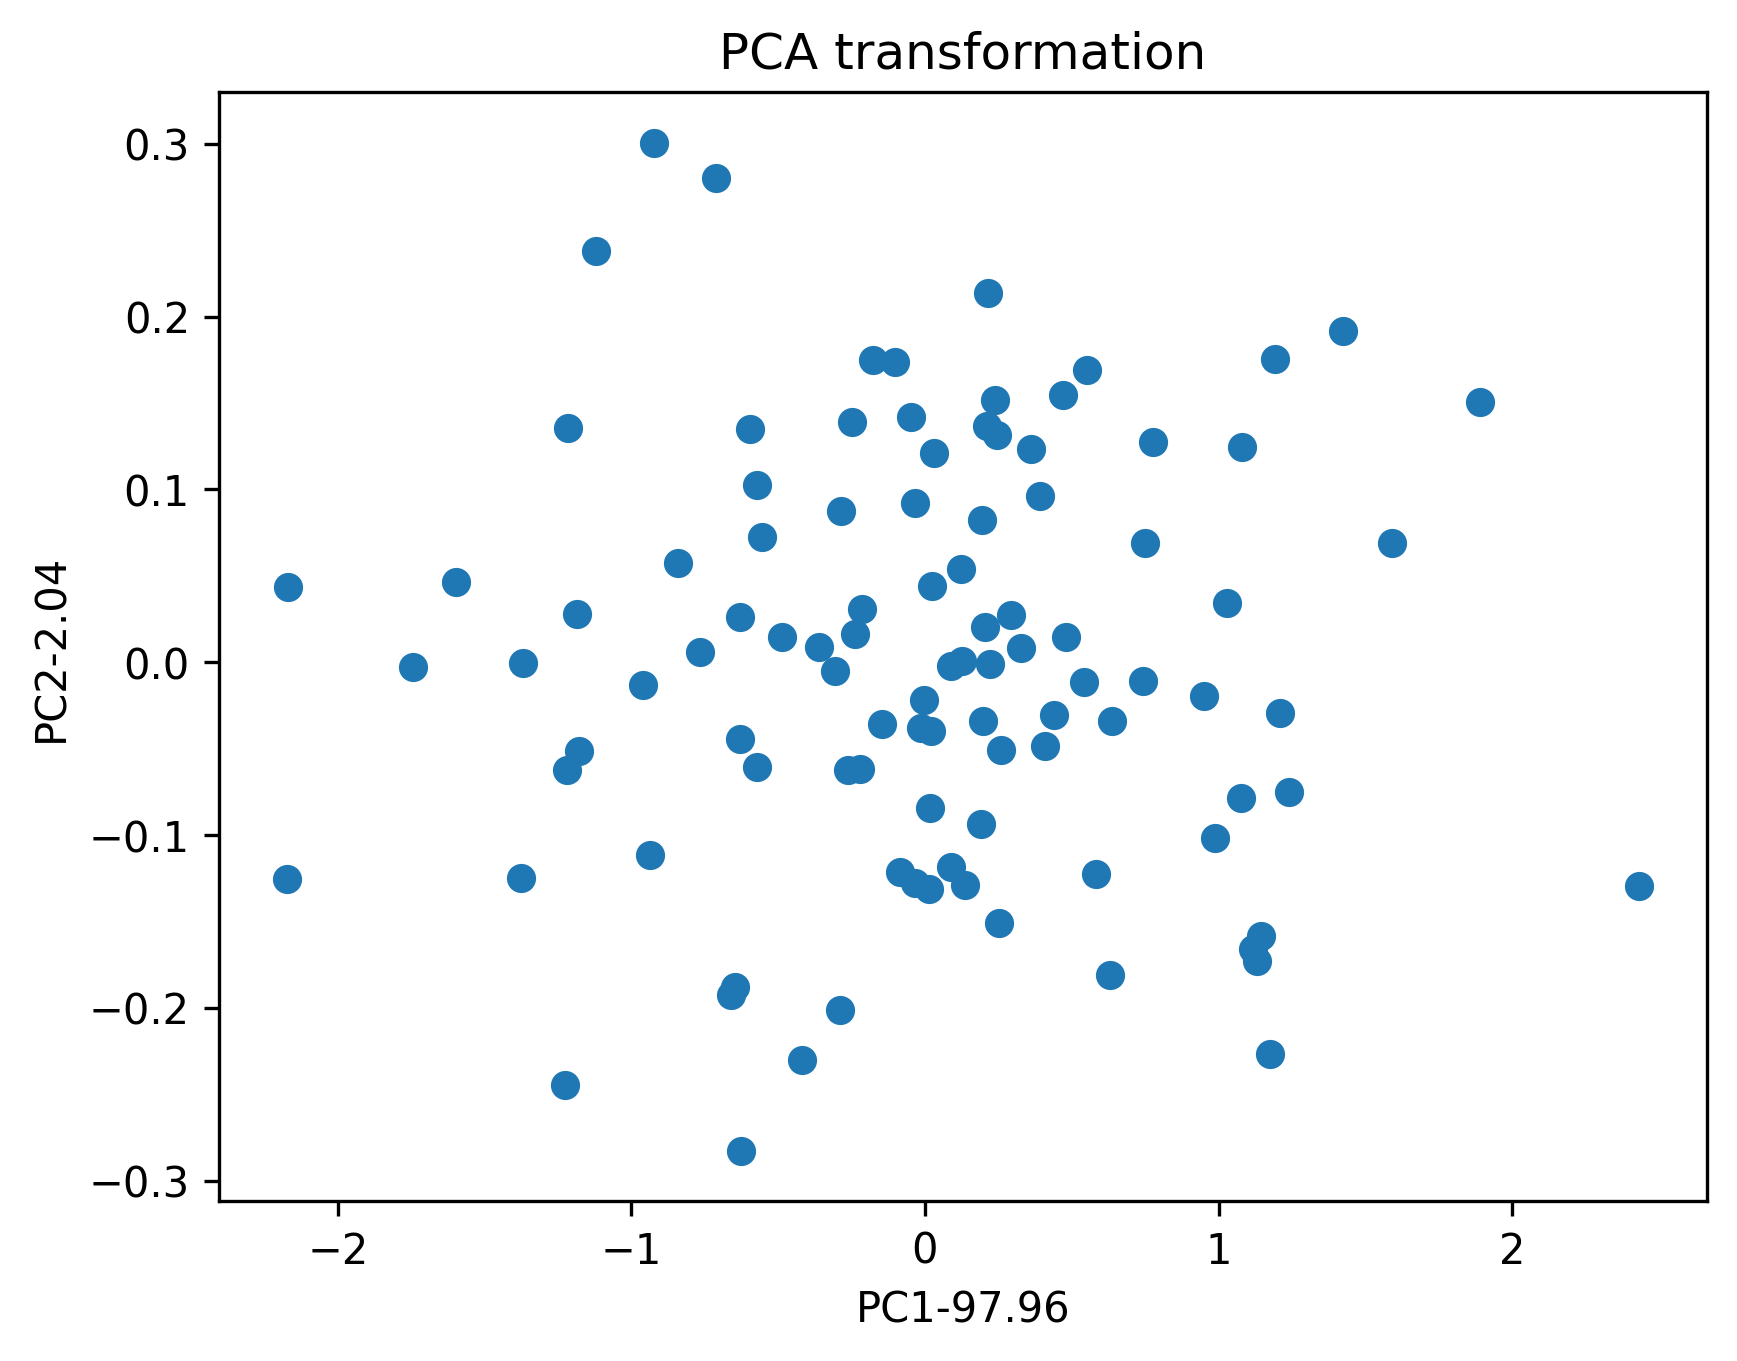

In [28]:
pca_data=pca.transform(X)
pca_df=pd.DataFrame(pca_data,columns=labels)
pca_df.head()
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA transformation")
plt.xlabel(f"PC1-{per_var[0]}")
plt.ylabel(f"PC2-{per_var[1]}")